 # PRCP-1027-Skin Disorder



**Dataset Overview**

This healthcare dataset consists of 34 columns, where 33 columns are treated as features and one column, labeled "class", serves as the target variable. The dataset is focused on diagnosing or analyzing a skin-related medical condition. The features are divided into two categories: 12 clinical features and 22 histopathological features. Each of these features is categorical, taking values in the range of 0, 1, 2, 3. A value of 0 represents the absence or minimal effect of the disease, while 1 and 2 represent mild effects, and 3 indicates a severe presence of the feature.

In addition to the categorical features, there is one continuous feature, Age, which is measured as a linear variable, representing the patient's age in years. This feature is distinct from the rest as it is continuous rather than categorical.

The target column, labeled "class" contains 6 unique values, each representing a distinct skin condition. This makes the dataset a multiclass classification problem.

# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset
df = pd.read_csv('/content/dataset_35_dermatology (1).csv')

# Basic check

In [3]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [5]:
df.shape

(366, 35)

# Exploratory Data Analysis

In [6]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [7]:
df.isnull().sum()

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


In [8]:
df.duplicated().sum()

np.int64(0)

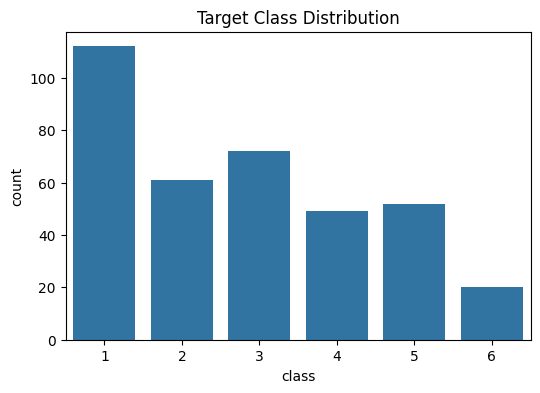

In [9]:
#Univariate analysis
# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title("Target Class Distribution")
plt.show()

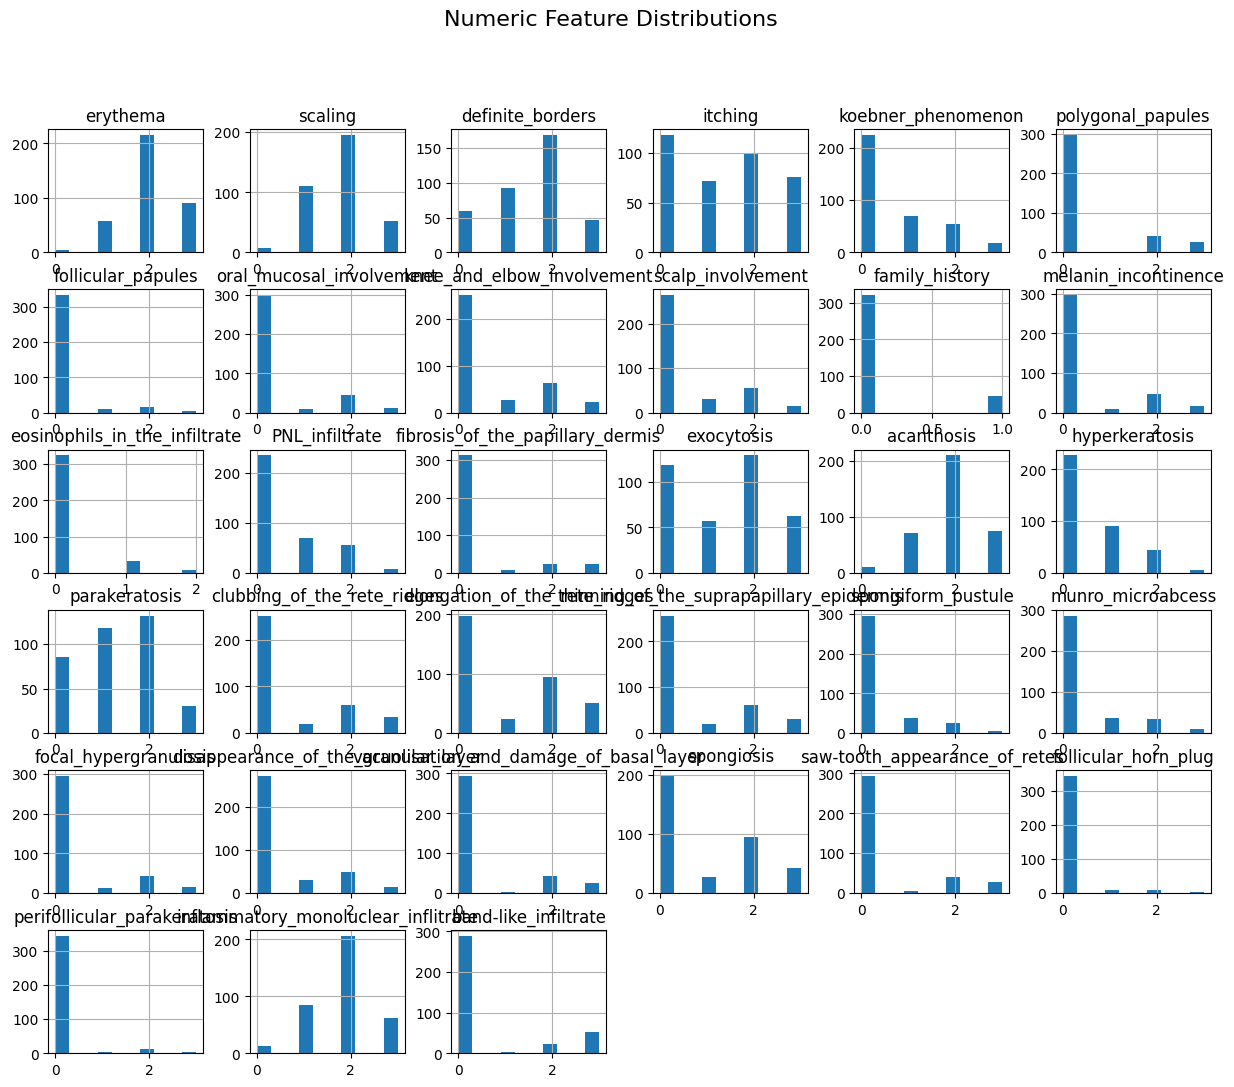

In [10]:
#  Feature Distributions
numeric_cols = df.select_dtypes(include=np.number).columns.drop('class')

df[numeric_cols].hist(bins=10, figsize=(15, 12))
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()

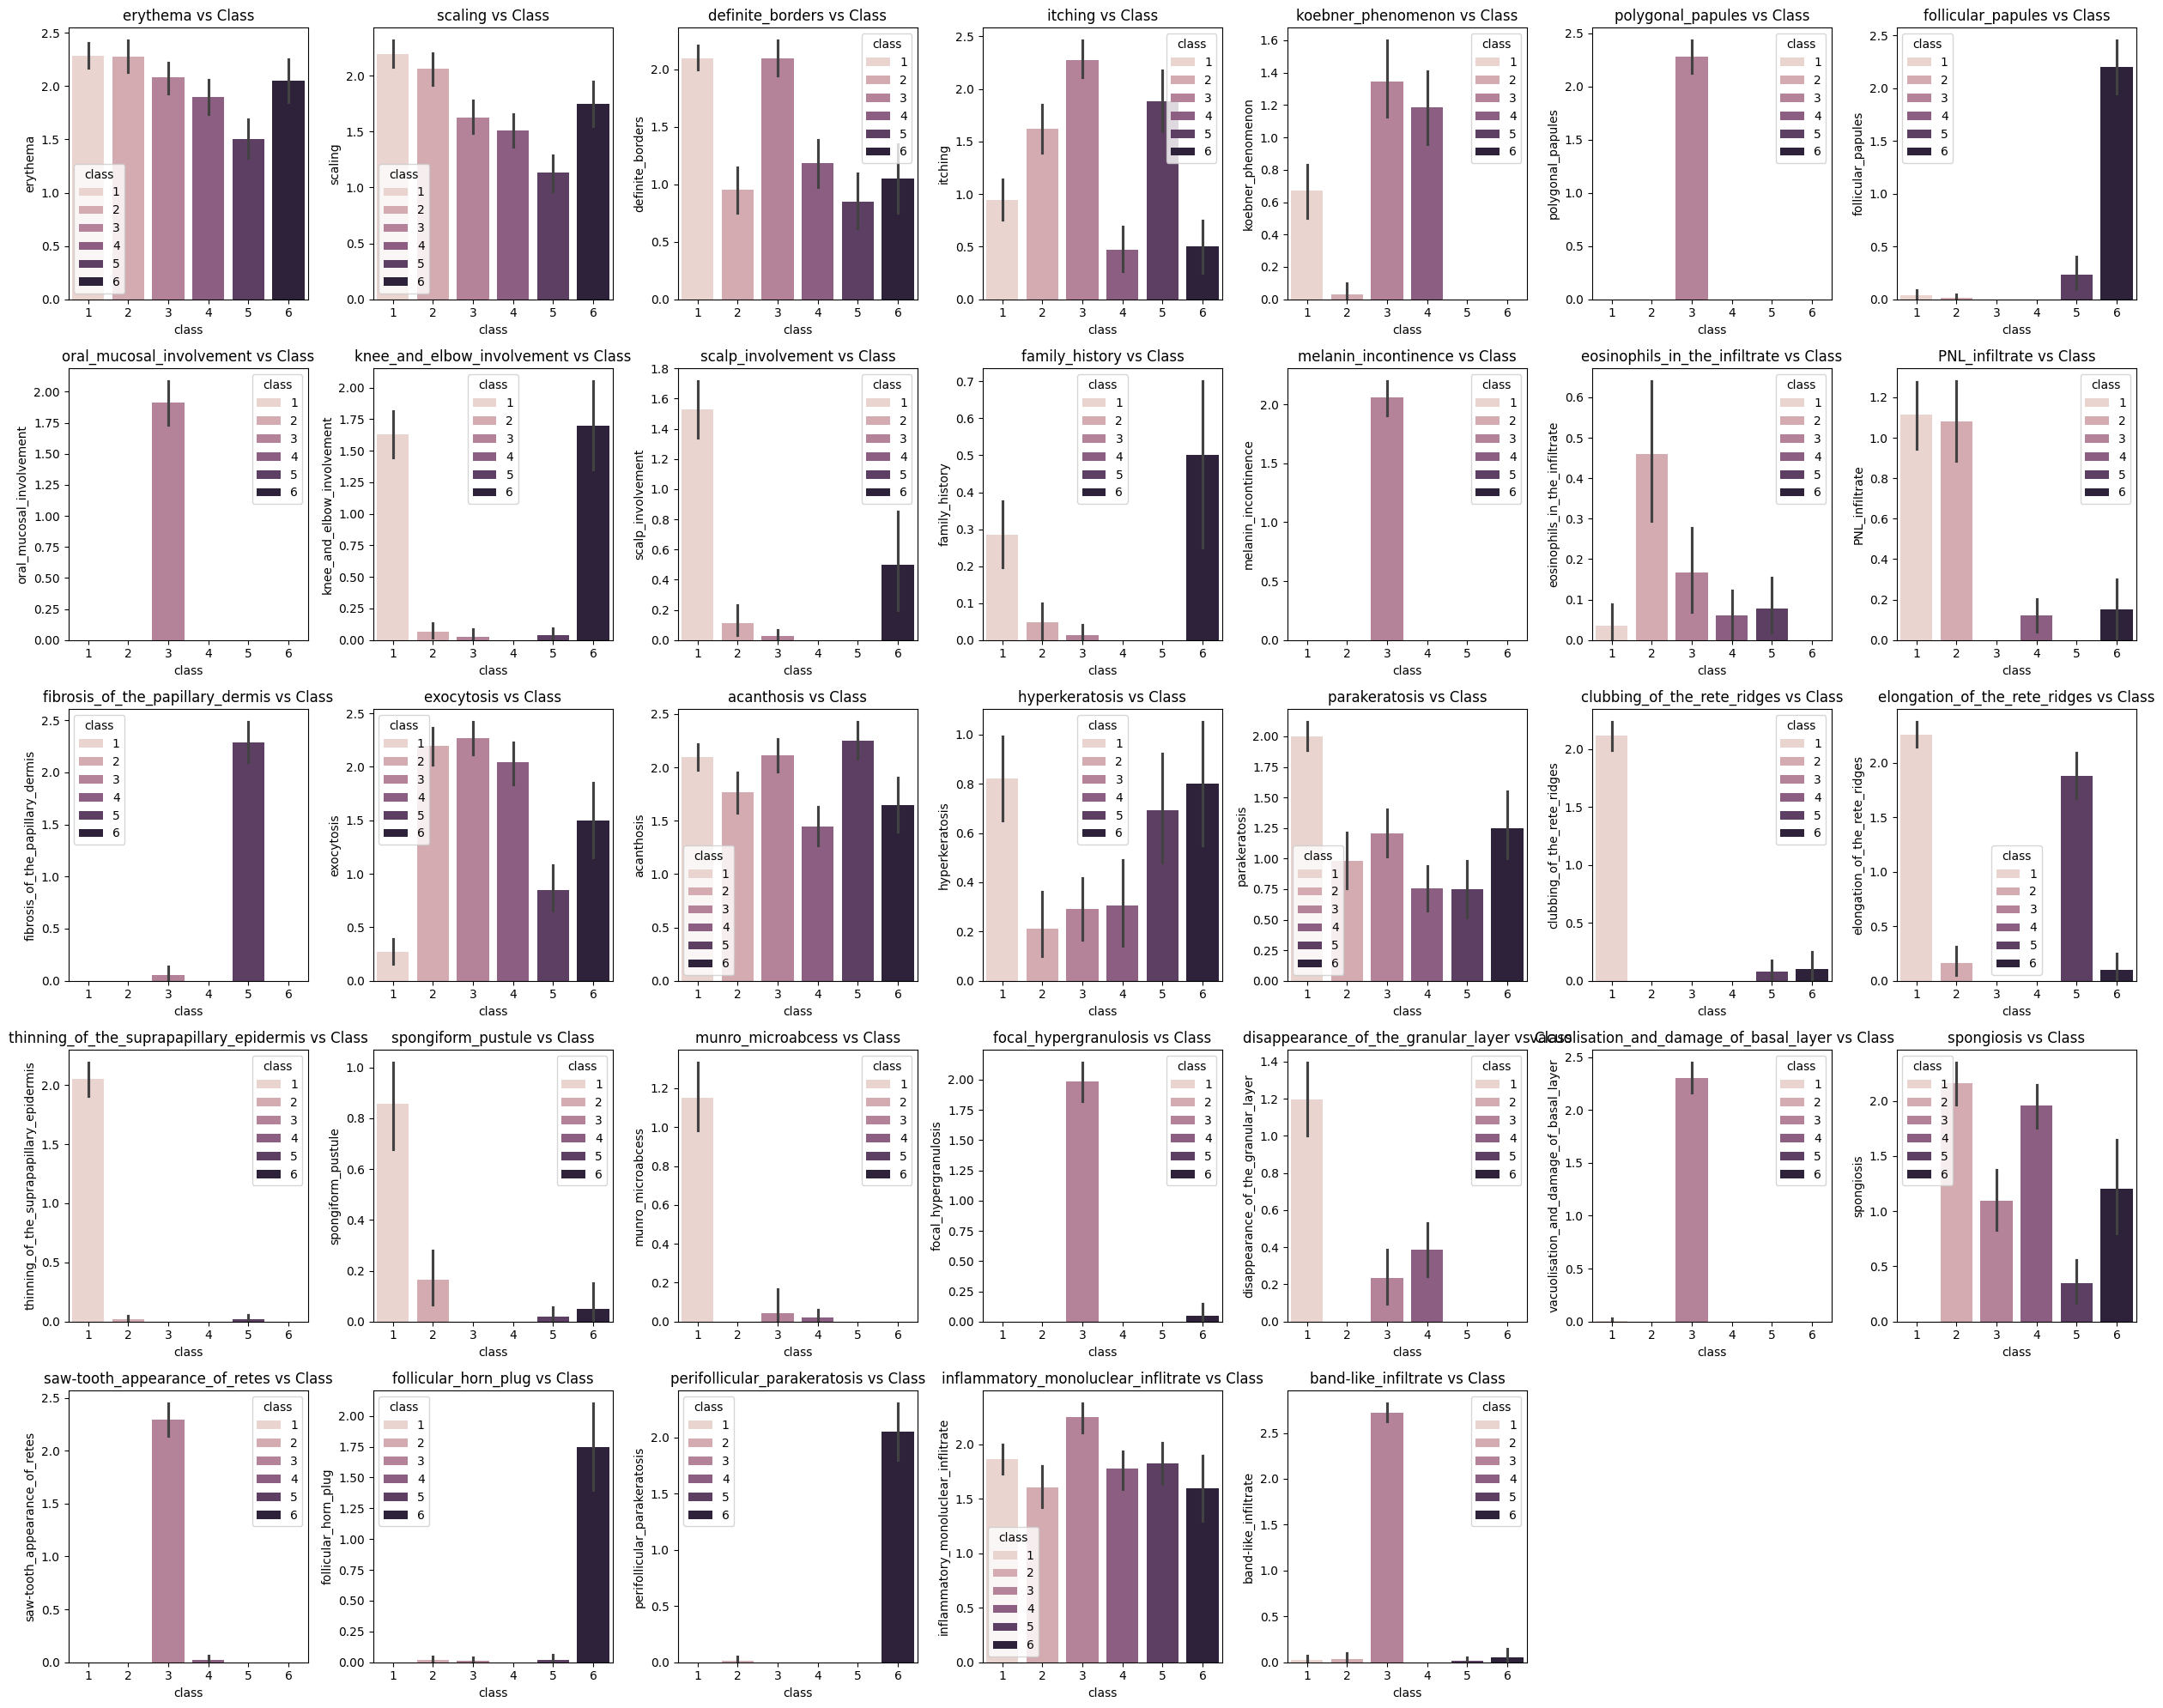

In [11]:
#Bivariate Analysis
# Feature vs Target
plt.figure(figsize=(25, 20))
n = 1

for col in numeric_cols:
    plt.subplot(5, 7, n)
    sns.barplot(x='class', y=col, data=df, hue='class')
    plt.title(f"{col} vs Class")
    n += 1

plt.tight_layout()
plt.show()

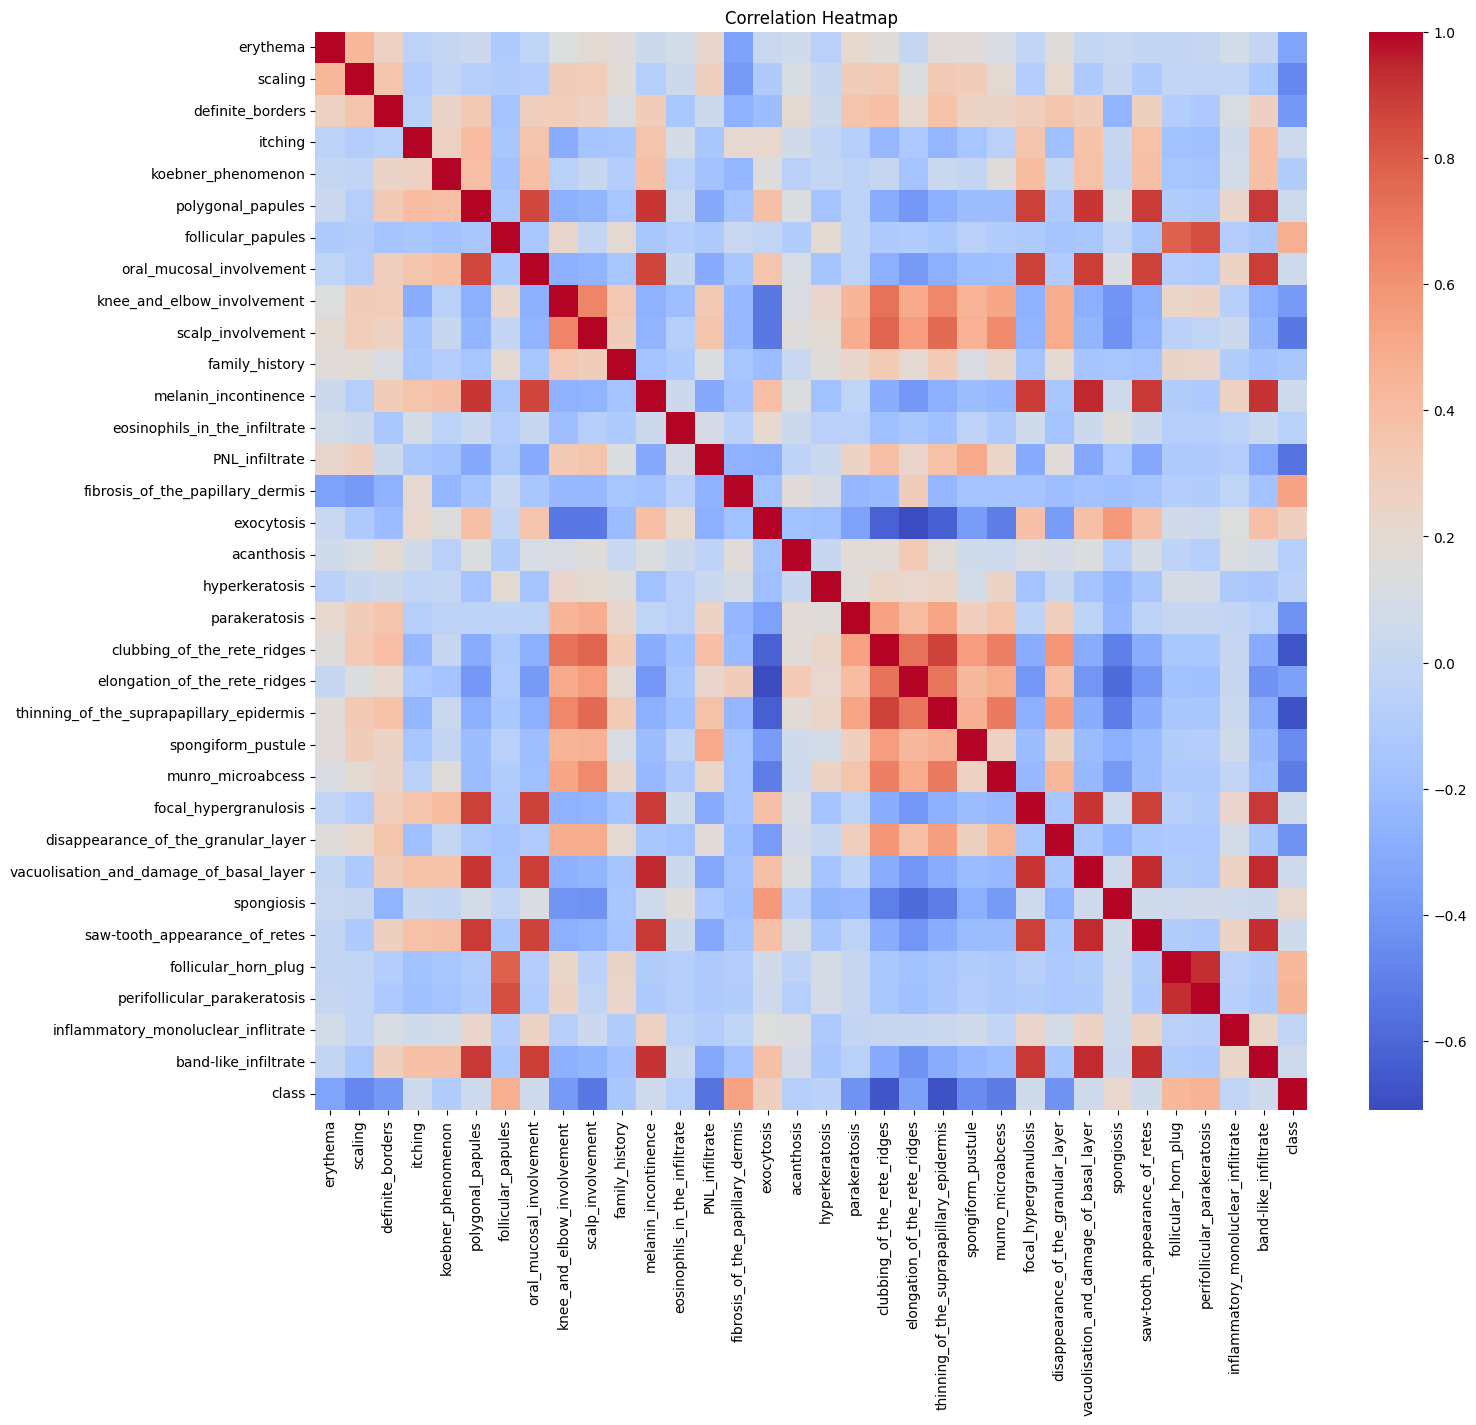

In [12]:
#Multivariate Analysis
# Correlation
plt.figure(figsize=(16, 14))
corr_matrix = df[numeric_cols.tolist() + ['class']].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [13]:
#Class Balance Check

print("\nClass Counts:\n", df['class'].value_counts())
print("\nClass Percentage:\n", df['class'].value_counts(normalize=True) * 100)


Class Counts:
 class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

Class Percentage:
 class
1    30.601093
3    19.672131
2    16.666667
5    14.207650
4    13.387978
6     5.464481
Name: proportion, dtype: float64


# Data Preprocessing

In [14]:
df['Age'].dtype

dtype('O')

In [15]:
df['Age'] = df['Age'].replace('?', np.nan) # Replacing '?' in age with Nan
df['Age'] = pd.to_numeric(df['Age'], # Type casting from object to numeric
                          errors='coerce') # error = coerce means nan values return as nan

In [16]:
df['Age'].dtype

dtype('float64')

In [17]:
#Filling the null values with median using simpleImputer
from sklearn.impute import SimpleImputer
sr = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Age'] = sr.fit_transform(df[['Age']])

In [18]:
df['Age']

,Age
0,55.0
1,8.0
2,26.0
3,40.0
4,45.0
...,...
361,25.0
362,36.0
363,28.0
364,50.0


In [19]:
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


# Feature Engineering

In [20]:
x = df.drop('class', axis=1)
y = df['class']

In [21]:
df['class'].value_counts()

,count
class,
1,112
3,72
2,61
5,52
4,49
6,20


In [24]:
#Spliting dataset for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
# scaling the age column
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train['Age']=scaler.fit_transform(x_train[['Age']])
x_test['Age']=scaler.transform(x_test[['Age']])

In [26]:
#Since dataset has imbalanced count in each class , we need balance it by oversampling

In [27]:
pip install imblearn

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [29]:
y_train_smote.value_counts()

,count
class,
5,81
2,81
1,81
4,81
3,81
6,81


# Model Creation

In [30]:
# logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr=LogisticRegression()
lr.fit(x_train_smote,y_train_smote)#Training

LogisticRegression()

In [31]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_smote,y_train_smote)#Training

KNeighborsClassifier()

In [32]:
#SVC

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train_smote,y_train_smote)#Training

SVC()

In [33]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_smote,y_train_smote)
y_pred=rf.predict(x_test)

In [34]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train_smote,y_train_smote) #training

GradientBoostingClassifier()

# Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(name, model, X_test, y_test):
    # Prediction
    y_pred = model.predict(X_test)

    print(f" Model Evaluation: {name}\n")

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"✔️ Accuracy: {acc:.4f}\n")

    # Classification report
    print(" Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel("Prediction")
    plt.ylabel("Real Value")
    plt.show()
    print("\n")

 Model Evaluation: Logistic Regression

✔️ Accuracy: 0.9865

 Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



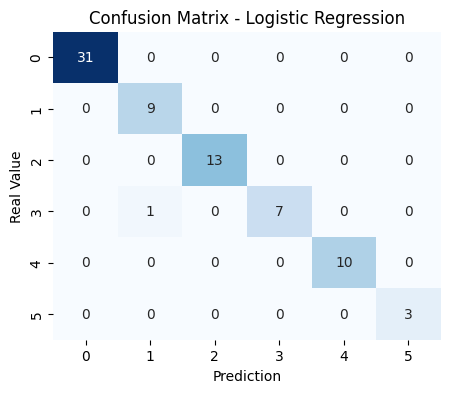



 Model Evaluation: K-Nearest Neighbors

✔️ Accuracy: 0.9595

 Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        31
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       0.75      1.00      0.86         3

    accuracy                           0.96        74
   macro avg       0.93      0.97      0.94        74
weighted avg       0.97      0.96      0.96        74



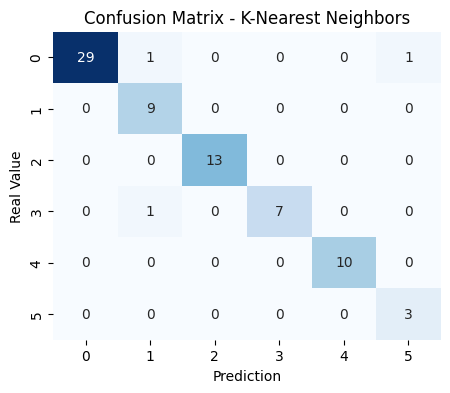



 Model Evaluation: Support Vector Machine

✔️ Accuracy: 0.9865

 Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



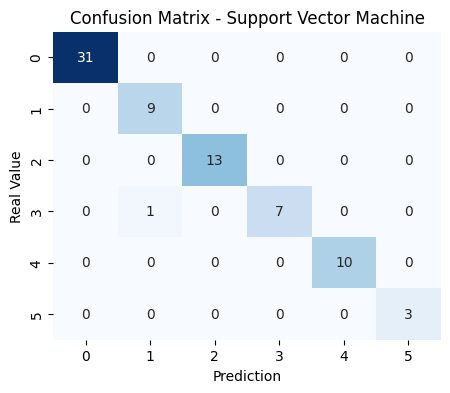



 Model Evaluation: Random Forest

✔️ Accuracy: 0.9865

 Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



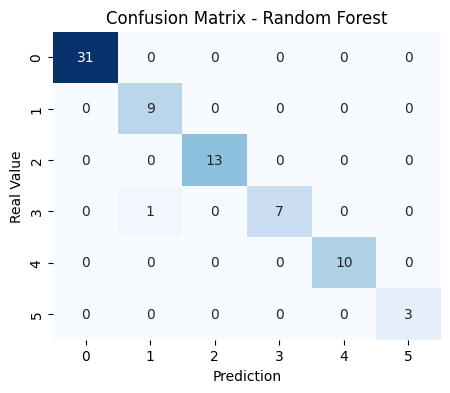



 Model Evaluation: Gradient Boosting

✔️ Accuracy: 0.9865

 Classification Report:
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.99      0.98      0.99        74
weighted avg       0.99      0.99      0.99        74



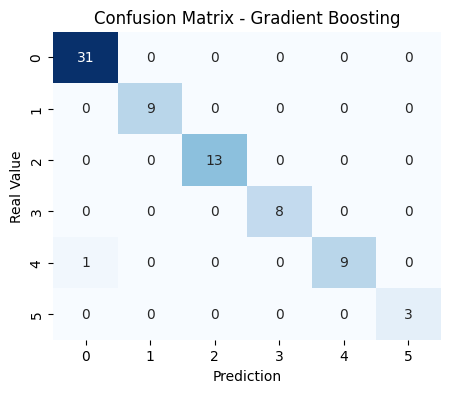

In [36]:
models = {
    'Logistic Regression': lr,
    'K-Nearest Neighbors': knn,
    'Support Vector Machine': svc,
    'Random Forest': rf,
    'Gradient Boosting': gb
}

for name, model in models.items():
    evaluate_model(name, model, x_test, y_test)

In [37]:
from sklearn.model_selection import KFold, StratifiedKFold

# Normal K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
from sklearn.model_selection import cross_val_score
for name,model in models.items():
  scores = cross_val_score(model, x, y, cv=skf)
  print(f'{name}')
  print("Cross-validated Accuracy: ", scores.mean())

Logistic Regression
Cross-validated Accuracy:  0.9699000370233246
K-Nearest Neighbors
Cross-validated Accuracy:  0.8769714920399851
Support Vector Machine
Cross-validated Accuracy:  0.7131062569418734
Random Forest
Cross-validated Accuracy:  0.983598667160311
Gradient Boosting
Cross-validated Accuracy:  0.9699370603480192


# Model Comparison Report

We have tested 5 Classification models to predict the Skin Disorder. Here the detailed report.

| **Model**                 | **Accuracy** | **Macro Avg Precision** | **Macro Avg Recall** | **Macro Avg F1-score** | **Cross-validated Accuracy** |
| ------------------------- | ------------ | ----------------------- | -------------------- | ---------------------- | ---------------------------- |
| Logistic Regression       | **0.9865**   | 0.98                    | 0.98                 | 0.98                   | 0.9699                       |
| K-Nearest Neighbors (KNN) | 0.9595       | 0.93                    | 0.97                 | 0.94                   | 0.8770                       |
| Support Vector Machine    | **0.9865**   | 0.98                    | 0.98                 | 0.98                   | 0.7131                       |
| Random Forest             | **0.9865**   | 0.98                    | 0.98                 | 0.98                   | **0.9836**                   |
| Gradient Boosting         | **0.9865**   | 0.99                    | 0.98                 | 0.99                   | 0.9699                       |



**Analysis:**

**Accuracy Performance:**

- Logistic Regression, SVM, Random Forest, and Gradient Boosting all achieved 0.9865 accuracy, outperforming KNN (0.9595).

**Cross-validation Insights:**

- Random Forest achieved the highest cross-validated accuracy (0.9836), indicating strong generalization on unseen data.

- Logistic Regression and Gradient Boosting also maintained high cross-validation scores (~0.97).

- SVM showed the lowest cross-validation score (0.7131) despite high test accuracy, suggesting possible overfitting.

- KNN had moderate accuracy but lower cross-validation performance (0.8770), indicating reduced generalization ability.

**Class-wise Observations:**

- All top-performing models classified most classes with perfect precision and recall, except for minor recall drops in certain classes.

- KNN had lower precision for class 6 (0.75), indicating more false positives for this rare category.

**Model Trade-offs:**

- Random Forest: Best generalization, stable across folds, strong performance for all classes.

- Logistic Regression: High accuracy, interpretable, fast to train and deploy.

- Gradient Boosting: Excellent performance with slight improvements in macro precision, but slightly lower CV score than Random Forest.

- SVM: High accuracy but poor cross-validation performance, possibly overfitting to training data.

- KNN: Easy to implement but less effective for small and imbalanced datasets.

**Result :**
 - Deploy Random Forest for production.
 - It combines high test accuracy (0.9865) with the best cross-validation performance (0.9836), indicating both strong predictive power and reliable generalization.


# Report on Challenges faced

| **Challenge**                                | **Description**                                                                                                                                | **Mitigation Strategy**                                                                                                                    |
| -------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| **1. Class Imbalance**                       | Certain classes, such as Class 6 (only 20 samples), were underrepresented, leading to unstable precision/recall and higher risk of overfitting. | Used **oversampling** (SMOTE) and collect more samples for minority classes.                         |
| **2. Feature Scaling Requirements**          | Models like SVM, Logistic Regression, and KNN required normalized features; without scaling, convergence and performance suffered.             | Applied **MinMaxScaler** before model training to ensure uniform feature contribution.                                 |


# Suggestions to Doctors

- According to model best accuracy score I would like to give suggestion to the doctors that you can enhance their diagnostic efficiency by utilizing the predictive model to assess skin diseases quickly based on clinical and histopathological features. By inputting these features, physicians receive immediate insights into potential conditions, allowing them to categorize the disease severity using a grading system from 1 to 6.

- This streamlined approach facilitates rapid decision-making, especially for cases with overlapping symptoms. Integrating the model into electronic health record (EHR) systems can further enhance workflow, ensuring that healthcare providers have easy access to model predictions during patient evaluations.